# Logistic Regression with non-linear features

## import library

In [698]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [699]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

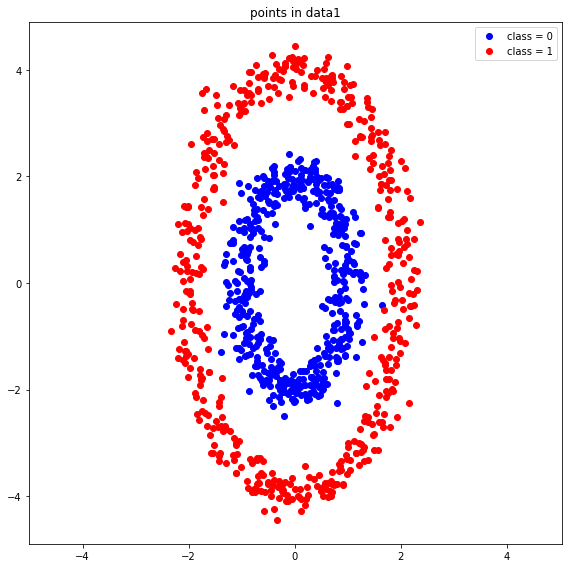

In [700]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

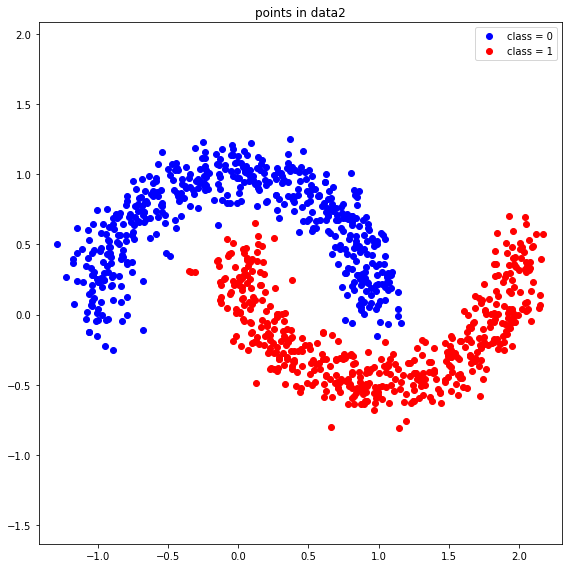

In [701]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [702]:
data1_point

array([[ 0.83159, -0.33906],
       [ 0.87196,  0.24418],
       [ 1.01934,  0.23241],
       ...,
       [ 2.01992, -0.31388],
       [ 2.30028,  0.22118],
       [ 1.82426, -0.14913]])

In [703]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #데이터1포인트가 인풋으로 들어왔을 때 그것의 피쳐함수를 정의하기. 모든 포인트에대한 피쳐벡터 정의 하기 
    #아 이 피쳐를 쌩으로 하는게 아니라 노말라이즈 같은걸 시켜주기 위해 하는구나~?
    point_x   = point[:, 1]
    point_y   = point[:, 2]
    degree = 6
    out = np.ones(point.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
    feature=out
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [740]:
# point_x   = data1_point[:, 0]
# point_y   = data1_point[:, 1]
# degree = 6
# out = np.ones(data1_point.shape[0])[:,np.newaxis]
# for i in range(1, degree+1):
#     for j in range(i+1):
#         out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
# print(out.shape)

In [705]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    point_x   = point[:, 1]
    point_y   = point[:, 2]
    degree = 6
    out = np.ones(point.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
    feature=out
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [706]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.inner(theta,feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [707]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1 + np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [708]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_linear_regression(theta, feature)
    value = sigmoid(y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [709]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_logistic_regression(theta, feature)
    residual=-label*np.log(y) - (1 - label)*np.log(1 - y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [710]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    loss = (1/number_data1)*np.sum(compute_residual(theta, feature, label))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

## define the gradient of the loss with respect to the model parameter $\theta$

In [711]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    gradient1=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient2=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient3=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient4=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient5=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient6=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient7=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient8=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient9=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient10=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient11=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient12=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient13=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient14=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient15=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient16=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient17=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient18=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient19=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient20=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient21=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient22=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient23=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient24=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient25=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient26=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient27=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    

    
    gradient=np.array([gradient1,gradient2,gradient3])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [712]:
# def compute_accuracy(theta, feature, label):

#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     # 정확하게 클래시파이어가 구분한 수 / 전체 포인트 수 
    
#     a=compute_logistic_regression(theta, feature)
#     c=np.where(a>0.5,1,0)
#     d=[]
#     for i,j in zip(label,c):
#         if i==j:
#             d.append(1)
#     accuracy=len(d)/len(label)             
#     #
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++

#     return accuracy

In [713]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 정확하게 클래시파이어가 구분한 수 / 전체 포인트 수 
    
    prob=compute_logistic_regression(theta, feature)
    predicted_labels=np.where(prob>0.5,1,0)
    diff = predicted_labels - label
    accuracy=1.0 - (float(np.count_nonzero(diff)) / len(diff))         
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [743]:
data1_number_iteration   = 1000
data2_number_iteration   = 1000

data1_learning_rate   = 0.01 
data2_learning_rate   = 0.01 

data1_number_feature    = 28##아 여기서 사용할 포인터의 피쳐벡터를 설정하는구나 마치 트레인셋같은개념인가?
data2_number_feature    = 28 

theta1  = np.zeros(data1_number_feature)#그래서 이 수만큼 세타의 수도 같이 조정이된다. 
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [744]:
point_class_0   = np.ones((1000, 3))

In [745]:
point_class_0[:, 1] = data1_point[:,0]
point_class_0[:, 2] = data1_point[:,1]
data1_point2=point_class_0

In [746]:
from tqdm import tqdm

In [747]:
for i in tqdm(range(data1_number_iteration)):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #지금 그라디언트디센트구하는과정에서 넘파이 결합할때 3개밖에안된다. 그걸 해소해야한다.
    theta1      = theta1-(data1_learning_rate*compute_gradient(theta1, compute_feature1(data1_point2), data1_label))
    loss1       = compute_loss(theta1, compute_feature1(data1_point2), data1_label)
    accuracy1   = compute_accuracy(theta1, compute_feature1(data1_point2), data1_label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (28,) (3,) 

In [749]:
theta1.shape

(28,)

In [751]:
(data1_learning_rate*compute_gradient(theta1, compute_feature1(data1_point2), data1_label)).shape

(3,)

In [719]:
point_class_1   = np.ones((1000, 3))
point_class_1[:, 1] = data2_point[:,0]
point_class_1[:, 2] = data2_point[:,1]
data2_point2=point_class_0

In [720]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = theta2-(data2_learning_rate*compute_gradient(theta2, data2_point2, data2_label))
    loss2       = compute_loss(theta2, data2_point2, data2_label)
    accuracy2   = compute_accuracy(theta2, data2_point2, data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

In [721]:
compute_logistic_regression(theta2, data2_point2)

array([0.4993443 , 0.49926202, 0.49914097, 0.49906709, 0.49897298,
       0.49937169, 0.49890014, 0.49917579, 0.4991556 , 0.49945859,
       0.49923739, 0.49903951, 0.49908098, 0.49920272, 0.49933586,
       0.4993953 , 0.49902849, 0.49904643, 0.49897899, 0.49912551,
       0.4989658 , 0.49949928, 0.49901881, 0.49914771, 0.49934046,
       0.49888875, 0.49908054, 0.49919859, 0.4994926 , 0.49890297,
       0.49922469, 0.49920562, 0.49941251, 0.49917047, 0.49899139,
       0.49924496, 0.49925032, 0.49915868, 0.49925725, 0.49915245,
       0.49898819, 0.49919797, 0.49930361, 0.49915505, 0.49914827,
       0.49914882, 0.49933083, 0.49927833, 0.4992374 , 0.49968486,
       0.49917307, 0.49910778, 0.4992757 , 0.49936264, 0.49895933,
       0.49929799, 0.49913491, 0.4995548 , 0.49924053, 0.49972179,
       0.49927247, 0.49948636, 0.49934996, 0.49917148, 0.49919288,
       0.49945781, 0.49943767, 0.49943795, 0.49922186, 0.49926585,
       0.49920483, 0.49934243, 0.49916008, 0.49948808, 0.49939

___

___

## functions for presenting the results

___

___

In [722]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [723]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [724]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [725]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [726]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [727]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [728]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [729]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [730]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [731]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [732]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [733]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.6931452012
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.6931452012
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.5050000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.5050000000
**************************************************
## [RESULT 05]
**************************************************


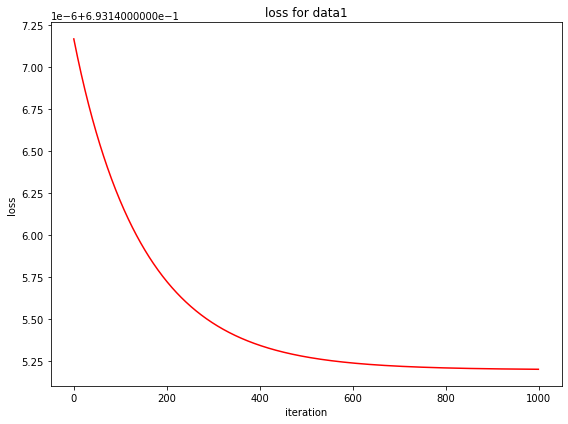

**************************************************
## [RESULT 06]
**************************************************


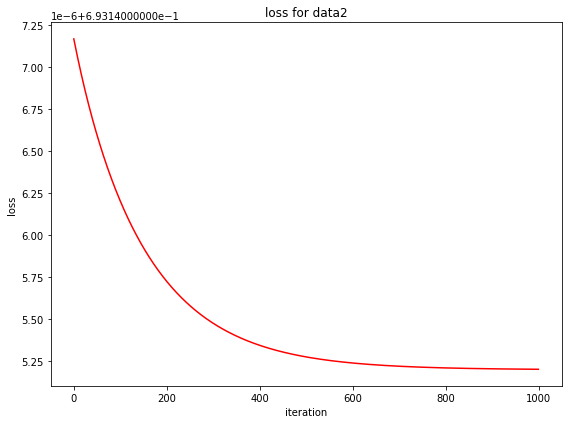

**************************************************
## [RESULT 07]
**************************************************


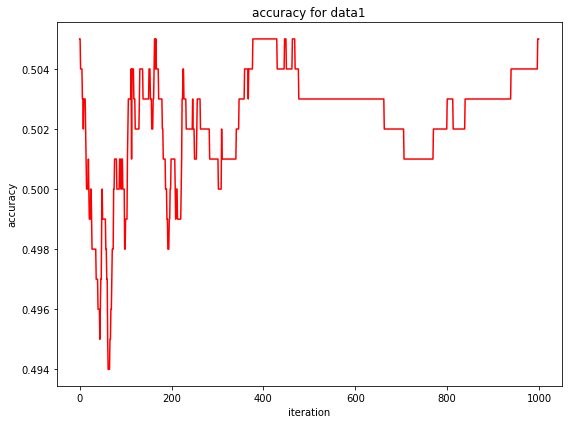

**************************************************
## [RESULT 08]
**************************************************


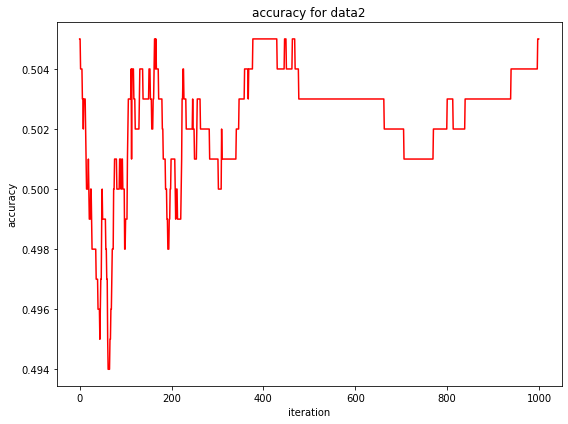

**************************************************
## [RESULT 09]
**************************************************


ValueError: all input arrays must have the same shape

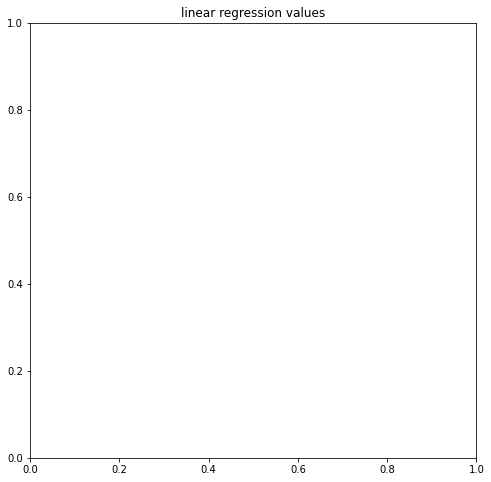

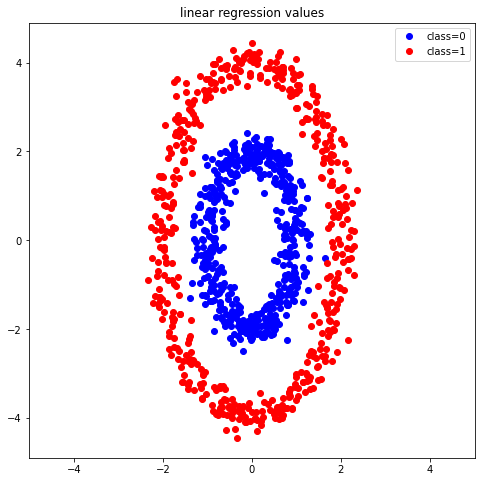

In [734]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)